<a href="https://colab.research.google.com/github/carmeniturbe/sales-predictions/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Steps

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
set_config(display='diagram')


filename = "/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Proyectos Data Science/Project 1 - Sales Predictions/sales_predictions_2023.csv"

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [86]:
# Cheking for number of rows and colums
df.shape

(8523, 12)

In [87]:
# Cheking for data types of rows and colums only
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [88]:
# Cheking for duplicates -- Count the duplicates
df.duplicated()
df.duplicated().sum()

0

In [89]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [90]:
# Examine the number of unique values in columns
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [91]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [92]:
# We'll remove the Item Weight column because there is likely little or no correlation between the item's weight and its likelihood of being sold.
df = df.drop(columns=['Item_Weight'])
df.head()


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [93]:
#Checking the types of outlets
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [94]:
#it makes sence to move all the supermarkets into the same category
df['Outlet_Type']= df['Outlet_Type'].replace(["Supermarket Type1","Supermarket Type2","Supermarket Type3"], "Supermarket")
df['Outlet_Type'].value_counts()

Supermarket      7440
Grocery Store    1083
Name: Outlet_Type, dtype: int64

In [95]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [96]:
# Standardize the values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [97]:
# Check the 'Outlet_Size' to see if it can be turned into ordinal data
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [98]:
# We'll turn the 'Outlet_Size' into a ordinal data
replacement_dictionary = {'Small':1, 'Medium':2, 'High':3}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size'].value_counts()

2.00    2793
1.00    2388
3.00     932
Name: Outlet_Size, dtype: int64

In [99]:
df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [100]:
#train test split
X = df.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.dtypes
#we drop the identifiers because they only help to identify, it is not a factor of items

Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [101]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [102]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')  # to fill the missing values in the 'Outlet_Size' column
# Scaler
scaler = StandardScaler() # for numeric data
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) # to turn categorical variables into a numerical representation

In [103]:
# Numeric pipeline
numeric_pipe = make_pipeline(freq_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [104]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [105]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cb6af0a2fe0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cb6af0a1bd0>)])

In [106]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cb6af0a2fe0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cb6af0a1bd0>)])

In [107]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [108]:
# checking the final values
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 27)




array([[-0.71277507,  1.82810922,  1.32784893, ...,  1.        ,
         0.        ,  1.        ],
       [-1.29105225,  0.60336888,  1.32784893, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.81331864,  0.24454056,  0.13618724, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.92052713,  1.52302674,  0.49368575, ...,  0.        ,
         0.        ,  1.        ],
       [-0.2277552 , -0.38377708,  1.0895166 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.95867683, -0.73836105, -0.10214509, ...,  0.        ,
         0.        ,  1.        ]])

#Linear Regression Model

In [109]:
# Fit the Linear Regression model
sales_model = LinearRegression()
sales_model.fit(X_train_processed, y_train)

LinearRegression()

In [112]:
# predictions
# Train set predictions
train_preds = sales_model.predict(X_train_processed)
# Test set predictions
test_preds = sales_model.predict(X_test_processed)
print(train_preds)
print(test_preds)

[3934.29626376 2788.1728723  2291.82726754 ... 3853.44346355 1685.79208273
 1757.97254582]
[1848.81613949  936.47476601  572.48480974 ... 3392.36955213 1696.03201885
 2210.96475206]


In [110]:
# Linear regresion R2 scores
train_score = sales_model.score(X_train_processed, y_train)
print(train_score)

0.533608410362132


In [111]:
# Linear regresion R2 scores
test_score = sales_model.score(X_test_processed, y_test)
print(test_score)

0.5287093619755183


The test set results are comparable to the Training though is slightly above 50%

In [113]:
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train_processed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test_processed))))

Training RMSE: 1174.846905131472
Testing RMSE: 1140.2982795152557


The Test mean square error (RMSE) is comparable (close) to the Training set mean square error (RMSE).

# Decision Tree Model

In [117]:
# Fit the Deceision Tree model
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [119]:
# Predictions
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)
print(train_preds)
print(test_preds)

[ 515.3292 3056.022  1577.946  ... 6145.334  1649.8524  965.41  ]
[ 805.618  1249.0408 1216.4166 ... 6851.082  3243.7776 2354.2688]


In [122]:
#R2 scores
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.21779529168612466


In [135]:
#hyperparameter adjustment
dec_tree.get_depth()

38

In [136]:
# List of values ​​to test for max_depth:
max_depth_range = list(range(2, 38))# will try every value between 2 and 38
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

print(r2)

[0.4337775044707164, 0.5242218617296539, 0.5840048628592629, 0.5947470502499344, 0.5839048985456301, 0.5783414027430644, 0.5591306573328272, 0.5426545703577935, 0.530649025684866, 0.4973649642117899, 0.46469434489257133, 0.4432298774133, 0.4072627745905659, 0.3894976257762245, 0.3500538543495735, 0.32884751095942133, 0.2999851000988335, 0.2878215566379295, 0.2902985439279462, 0.2573137388619645, 0.22497472837685306, 0.23783615375527223, 0.21488059042728502, 0.20371101576069983, 0.19811178092695392, 0.1932700915550133, 0.20551790784568746, 0.20865456187581588, 0.19751722700858143, 0.18916375518614126, 0.2147749373732304, 0.18746416540399036, 0.2016541460551977, 0.20750751748584007, 0.19504022097122398, 0.2116605501381401]


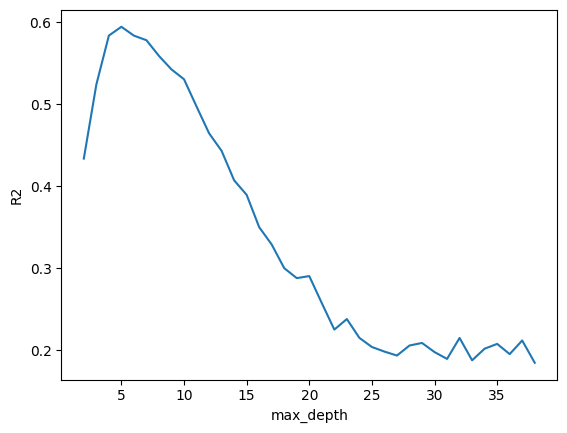

In [129]:
# Visualize what max_depth leads to a higher R2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [147]:
# Desicion Tree number 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
#R2
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.6259687154308151
0.5783414027430644


In [149]:
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree_2.predict(X_train_processed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,dec_tree_2.predict(X_test_processed))))

Training RMSE: 1052.1069426582408
Testing RMSE: 1078.5854129554593


#Model Evaluation and Findings:
Upon evaluating the performance of the Linear Regression model, we observed an R² score of 0.5336 for the training data and 0.5287 for the test data. Additionally, the RMSE values were calculated to be 1174.85 for training and 1140.30 for testing. These metrics suggest that the Linear Regression model captures a certain degree of variance, albeit with moderate predictive accuracy. The test RMSE indicates the average error between the predicted and actual values.

In contrast, the Decision Tree Regressor model yielded more promising results. The R² score for the training data was 0.626, while the test data exhibited an R² score of 0.5783. The corresponding RMSE values for training and testing were 1052.11 and 1078.59, respectively. The Decision Tree Regressor demonstrates better predictive ability and a closer fit to the actual values in comparison to the Linear Regression model.

#Conclusion and Recommendation:
Considering the presented findings, we can confidently recommend the Decision Tree Regressor model for the dataset at hand. The model's superior R² scores and comparatively lower RMSE values on both training and testing data indicate a stronger ability to capture underlying patterns and generalize to unseen data. The Decision Tree Regressor offers improved predictive performance, making it a more suitable choice for our regression task.